In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io
from io import StringIO

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [10]:
def pyramid(n):
    for i in range(n):
        print(" "*(n-i)+"*"*(2*i+1))
    for j in range(n,-1,-1):
        print(" "*(n-j)+"*"*(2*j+1))

In [11]:
pyramid(5)

     *
    ***
   *****
  *******
 *********
***********
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [12]:
with open('symbols01.txt') as f:
    symbols_01 = f.read().splitlines()
          
set_01=set(symbols_01)

In [13]:
with open('symbols02.txt') as f:
    symbols_02 = f.read().splitlines()
          
set_02=set(symbols_02)

In [14]:
symbols_03 = set_01 or set_02

In [28]:
with open('symbols_03.txt', 'w') as f:
    for symbol in symbols_03:
        f.write(symbol.strip().upper() + "\n")

# Q3. 下載台灣上市公司基本資料

In [32]:
a = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [33]:
a.encoding = 'big5'
a_list = a.text.split("\r\n")

In [34]:
a_list = pd.read_csv(StringIO(data.text),skiprows = 1)

In [36]:
a_list.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [3]:
df = data['GOOG']

In [8]:
df['low9'] = df['Low'].rolling(window=9).min()
df['high9'] = df['High'].rolling(window=9).max()
df['WMSR'] = 100*((df['high9'] - df['Close']) / (df['high9'] - df['low9']) )

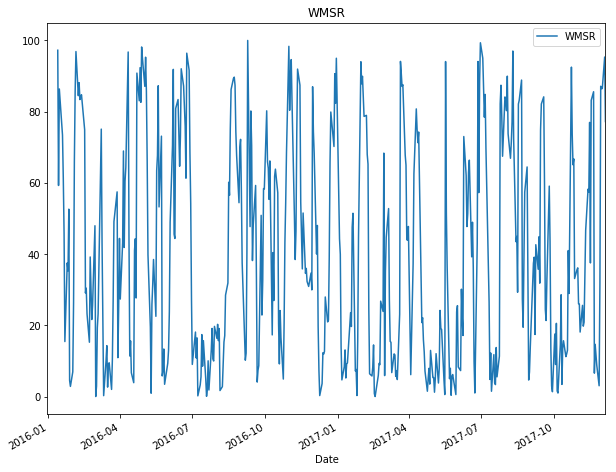

In [9]:
df.plot(y= ['WMSR'], title='WMSR',figsize=(10,8))

# Q5. 策略回測

In [10]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [11]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [12]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [13]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [14]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [15]:
#計算威廉指標(WMSR)
#WMSR<80時進場
#WMSR>20時出場

def M064030040_strategy(df):
    df['low9'] = df['Low'].rolling(window=9).min()
    df['high9'] = df['High'].rolling(window=9).max()
    df['WMSR'] = 100*((df['high9'] - df['Close']) / (df['high9'] - df['low9']) )
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['WMSR'][t] < 80:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['WMSR'][t] > 20:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [16]:
M064030040_strategy(df)

,Open,High,Low,Close,Adj Close,Volume,L14,H14,WMSR,low9,high9,signals,positions
Date,,,,,,,,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900,NaN,NaN,NaN,NaN,NaN,0,NaN
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,NaN,NaN,NaN,NaN,NaN,0,0.0
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,NaN,NaN,97.249242,698.609985,769.500000,0,0.0


In [17]:
def apply_strategy(strategy, df):
    return strategy(df)

In [28]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064030040_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy,M064030040_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [29]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [30]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.806836,-0.250577,281,1.297377,705,34,TICC,M064030040_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [32]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [33]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
7,2.107601,-0.237003,233,3.927267,705,27,TWIN,M064030040_strategy
27,2.036527,-0.138857,136,2.693917,705,25,RICK,M064030040_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
